# THE SPARKS FOUNDATION 

### DATA SCIENCE AND BUSINESS ANALYTICS (GRIP JULY'21)

### # Task 5

### Author: Ms. Valerena Clayton 

### Task Title: Prediction using Decision Tree Algorithm

### Problem Statement:
#### To create the Decision Tree classifier and visualize it graphically. 

Dataset provided:https://bit.ly/3kXTdox (Iris Dataset)

## Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. 
The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.


 ### **STEP 1**:- Importing libraries in Python and Data description

## Importing Libraries

In [8]:
# Importing the libraries

# Linear Algebra
import pandas as pd

# Data processing
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


### Importing Dataset 

In [9]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.read_csv(r"C://Users//Valerena//Desktop//Internship//The Sparks Foundation//Iris.csv")
df

y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Exploring the Data

In [6]:
#Summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Structure of Dataset
df.shape

(150, 6)

There are 150 observations and 4 columns for this dataset.

In [8]:
# Viewing Descriptive Statistic
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
# Checking for Null Values
df.isna().sum().to_frame('Null Values')

,Null Values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


I observe that the data set dosen't contain any null values or NaN.

In [11]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
df['Species_class']=np.where(df.Species=='Iris-virginica',1,np.where(df.Species=='Iris-versicolor',2,3))
df.Species_class.value_counts()

3    50
2    50
1    50
Name: Species_class, dtype: int64

In [11]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

### **STEP 2** :- Preparation of Model

In [23]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.Collecting pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=4411f6588fd2da4e4aef1540d90ba96030c5f3edc928225e9da290086a110609
  Stored in directory: c:\users\valerena\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [14]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( df[cols],
                                                  df['Species_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

### **STEP 3** :- Model Building

In [15]:

param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.0s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [17]:
tree.best_score_

0.9583333333333334

In [18]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=4)

In [19]:
tree.best_params_

{'max_depth': 4, 'max_features': 4}

In [20]:
train_pred = tree.predict(train_X)
test_pred = tree.predict(test_X)

In [21]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### **STEP 4** :- Building Final Decision Tree

In [22]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=2)

In [23]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [24]:
tree_test_pred.sample( n = 10 )

,actual,predicted
20,3,3
31,3,3
36,3,3
104,1,1
127,1,1
133,1,2
13,3,3
33,3,3
112,1,1
72,2,2


In [25]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9333333333333333

Text(0.5, 16.0, 'Predicted label')

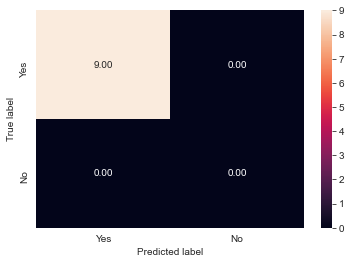

In [26]:

tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### **STEP 5** :- Graphical Representation of Decision Tree

In [29]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


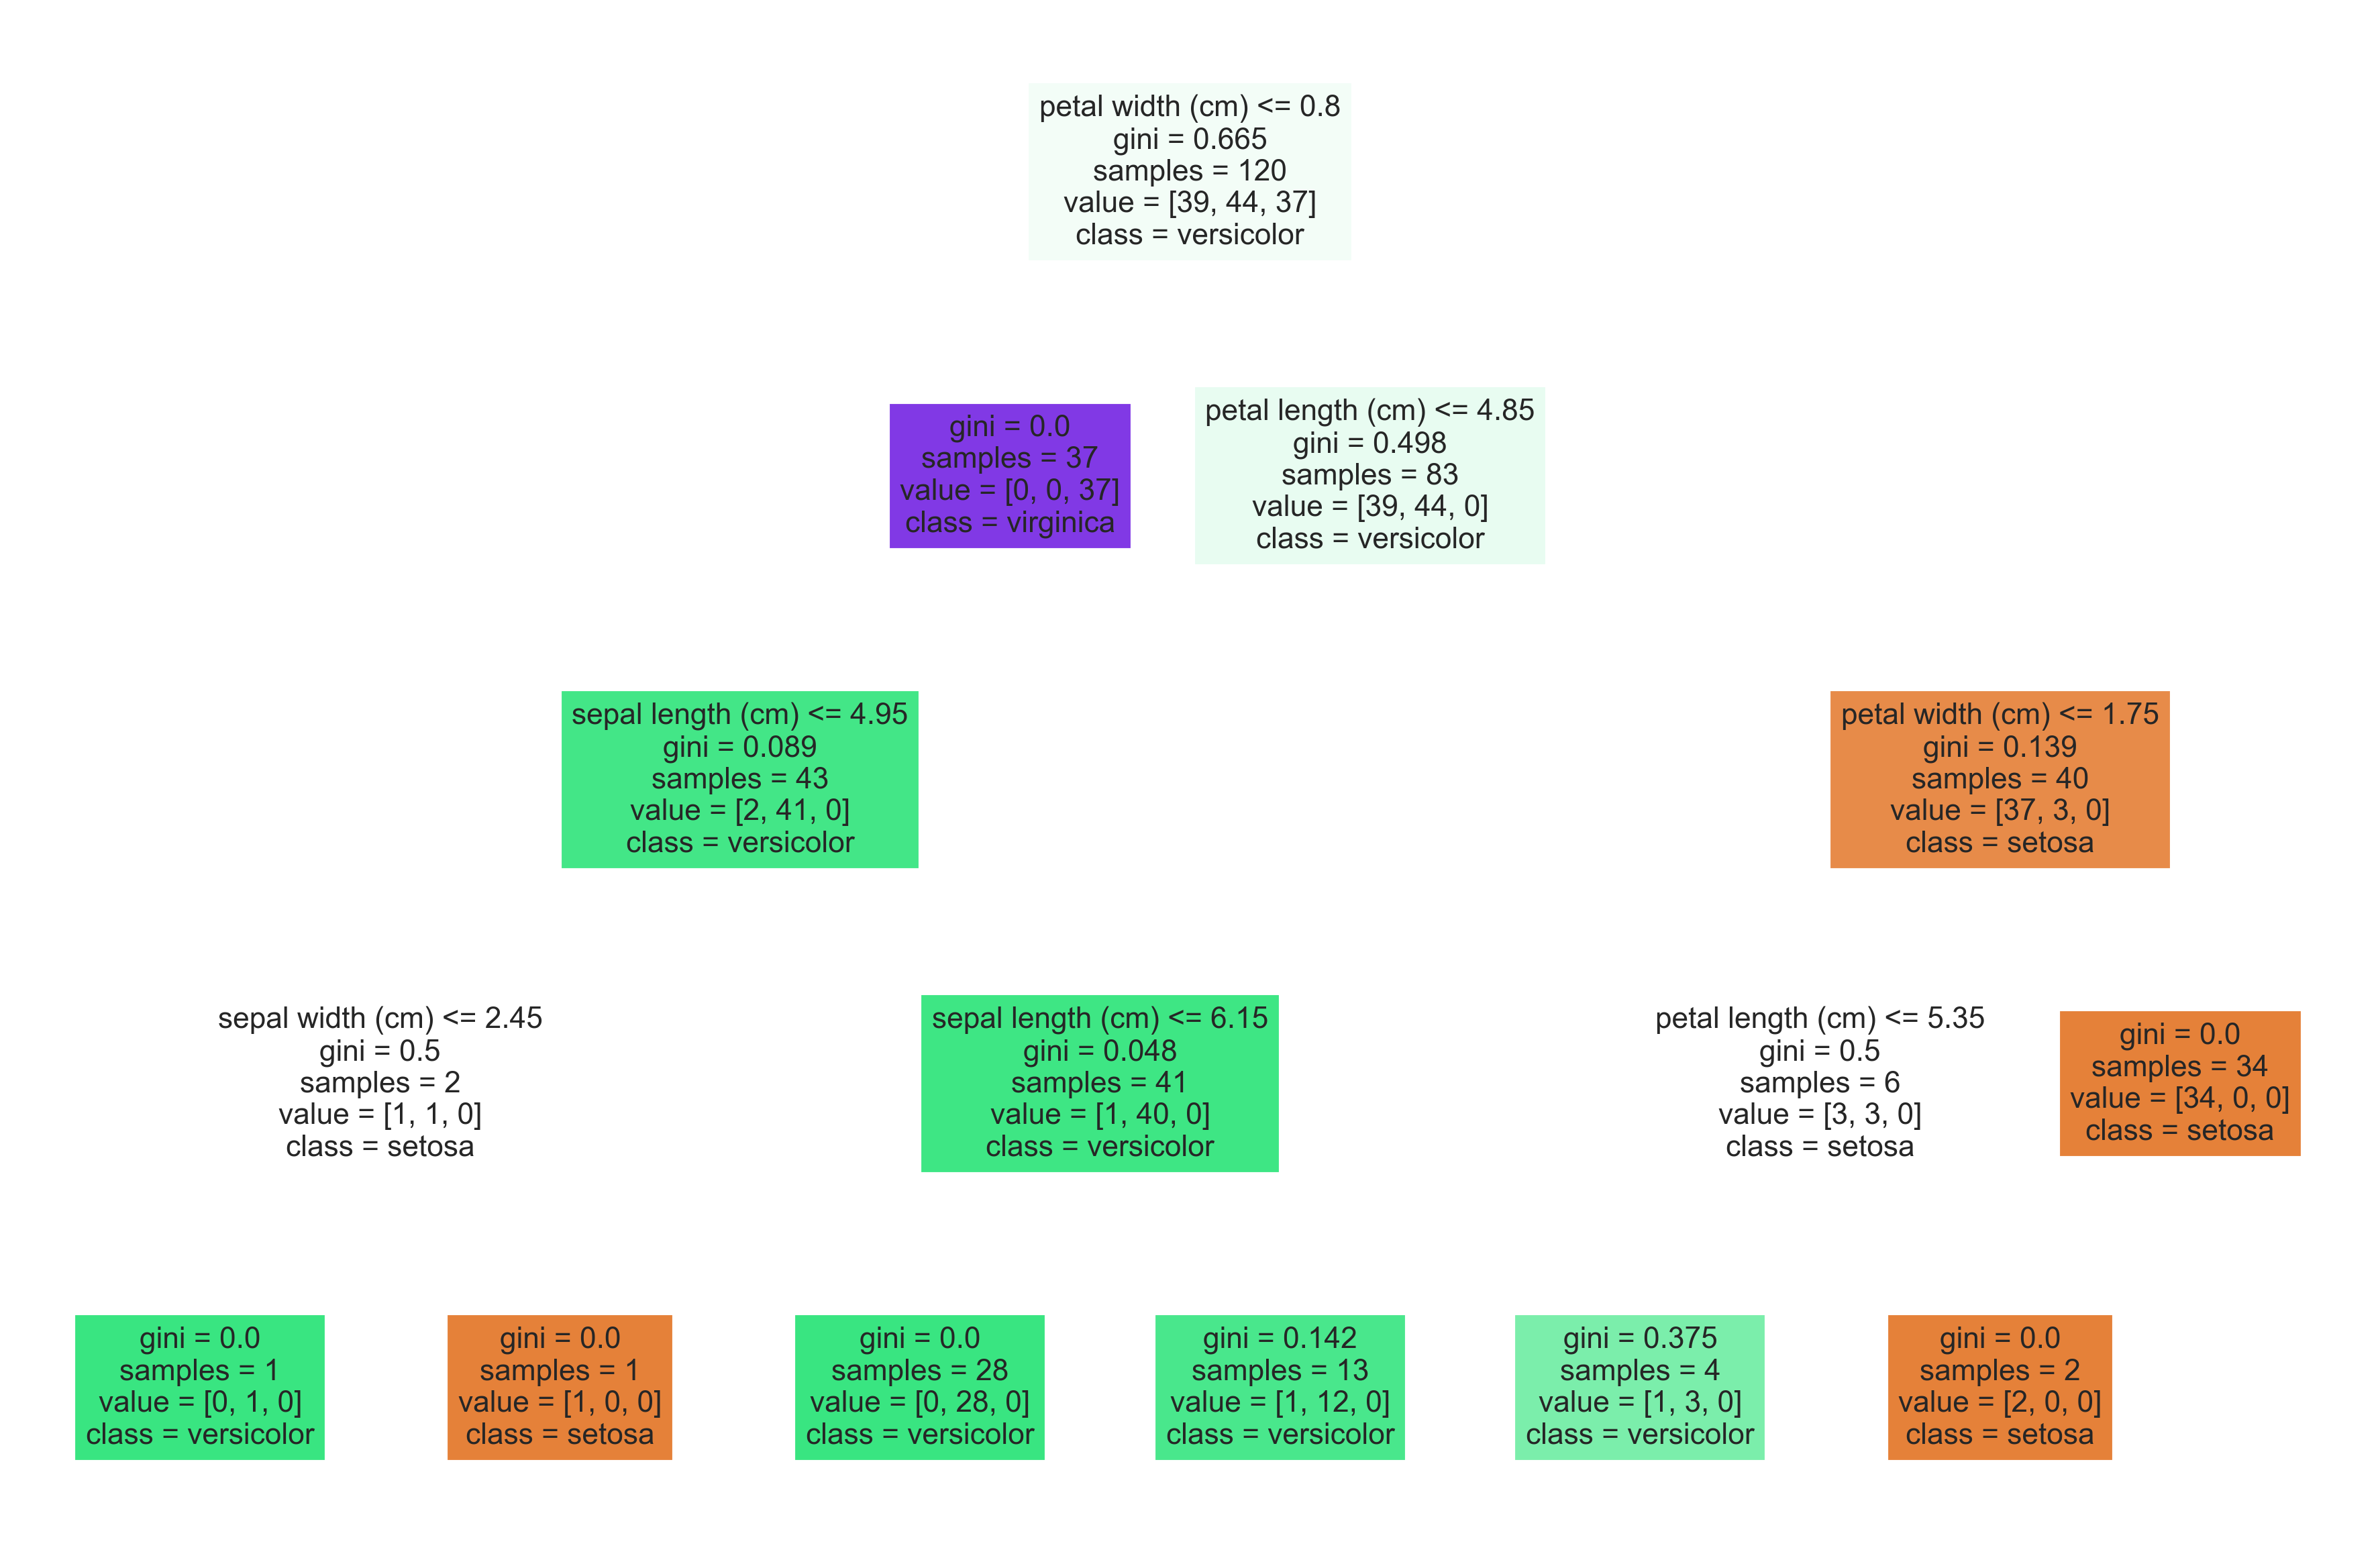

In [35]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')